In [2]:
import numpy as np
import matplotlib.pyplot as plt

$Ax=b$ significa che prendi $x$, e metti le sue componenti come se fossero per un vettore in $(v_1,v_2)$. Quindi $A$ prende un vettore $x$ e lo trasforma in $b$ cambiandogli la base da sotto il sedere. Invece di seguire la griglia di $(e_1,e_2)$, trovi $b$ percorrendo quella per $(v_1,v_2)$ usando le stesse componenti di $x$.

In [160]:
A = np.array([[1.9, 0.6],[0.4, 2.1]])

x  = np.array([-1,2])
b = A.dot(x)

v1=A[:,0]
v2=A[:,1]

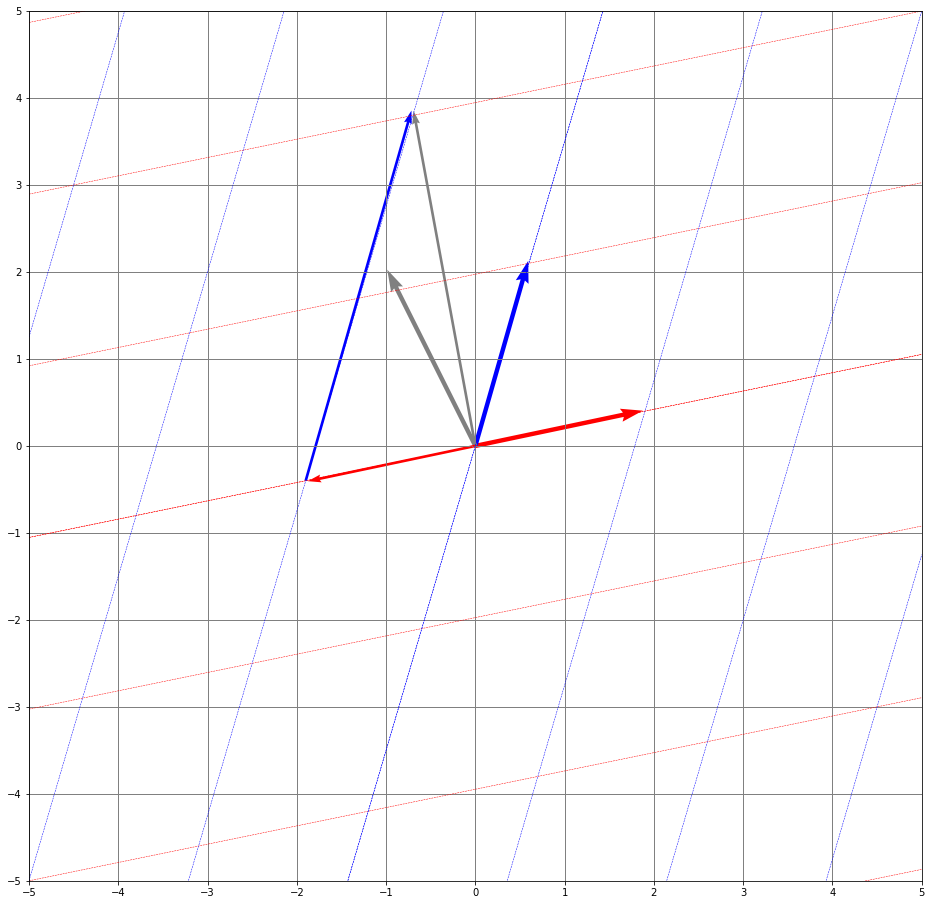

In [161]:
dmax=5

plt.figure(figsize=(16,16))
plt.xlim((-dmax,dmax))
plt.ylim((-dmax,dmax))
plt.xticks(np.arange(-dmax, dmax+1, 1.0))
plt.yticks(np.arange(-dmax, dmax+1, 1.0))
plt.grid(color='grey', linestyle='-', linewidth=1, which='both')

plt.quiver(0, 0, v1[0], v1[1], units='xy' ,scale=1, color='red', width = 0.05)
plt.quiver(0, 0, v2[0], v2[1], units='xy' ,scale=1, color='blue', width = 0.05)

plt.quiver(0, 0, x[0], x[1], units='xy' ,scale=1, color='grey', width = 0.05)
plt.quiver(0, 0, b[0], b[1], units='xy' ,scale=1, color='grey', width = 0.03)

plt.quiver(0, 0, x[0]*v1[0], x[0]*v1[1], units='xy' ,scale=1, color='red', width = 0.03, ls = '-.')
plt.quiver(x[0]*v1[0], x[0]*v1[1], x[1]*v2[0], x[1]*v2[1], units='xy' ,scale=1, color='blue', width = 0.03, ls = '-.')

xa = np.linspace(-dmax,dmax,100)
dist=v2[1]-v1[1]*v2[0]/v1[0]
for j in range(0,10):
    i=j*dist
    ya = v1[1]/v1[0]*xa+i
    plt.plot(xa, ya, '--r',lw ='0.5')
    ya = v1[1]/v1[0]*xa-i
    plt.plot(xa, ya, '--r',lw ='0.5')
dist=v1[1]-v2[1]*v1[0]/v2[0]
for j in range(0,10):
    i=j*dist
    ya = v2[1]/v2[0]*xa+i
    plt.plot(xa, ya, '--b',lw ='0.5')
    ya = v2[1]/v2[0]*xa-i
    plt.plot(xa, ya, '--b',lw ='0.5')

plt.show()

$Ax=b$ significa $CLC^{-1}x=b$, ossia
1. prendi $x$, e vedi che coordinate ha sulla griglia di $(w_1,w_2)$, e rappresentale sulla griglia normale come ``x_1``. $x$ **NON** cambia, semplicemente ottengo le sue coordinate in $(w_1,w_2)$, che riporto sulla griglia come se fossero per $(e_1,e_2)$:
$$C[x]_w=[x]\Rightarrow \texttt{x}\_\texttt 1:=[x]_w=C^{-1}[x]$$

*IN ALTERNATIVA*: $(w_1,w_2)$ sono una base di vettori non necessariamente figa come  $(e_1,e_2)$, quindi io disegno $x$ sul piano  $(e_1,e_2)$, poi stretcho il piano finché la griglia di $(w_1,w_2)$ non diventa $(e_1,e_2)$, trascinando dietro nella rotazione anche $x$. Ora $x$ sembra diverso da prima, perché ha rotato col piano, e il nuovo piano cartesiano ha modificato anche gli orientamenti di $(e_1,e_2)$. In questo nuovo piano, devo solo applicare una trasformazione in $L$, ossia dilatare $(w_1,w_2)$ quanto serve, e poi riprendere $(w_1,w_2)$ e rimetterli al posto iniziale. 
2. prendi $C^{-1}x$, lo dilati nelle due direzioni in $(w_1,w_2)$, quindi lungo le linee blu e rosse, moltiplicando per $L$. Se la griglia fosse per $(w_1,w_2)$, andrei da ``x_1`` a ``x_2``.
3. prendi $LC^{-1}x$, che sono coordinate in $(w_1,w_2)$, e moltiplicalo per $C$, ottenendo lo stesso vettore ma in $(e_1,e_2)$. Dunque $LC^{-1}x$ non cambia, semplicemente scopro come riscriverlo in $(e_1,e_2)$.

In [154]:
diagL, C = np.linalg.eig(A)
L = np.diag(diagL)
Cm1 = np.linalg.inv(C)
x_1 = Cm1.dot(x)
x_2 = L.dot(x_1)
x_3 = C.dot(x_2)

w1=C[:,0]
w2=C[:,1]

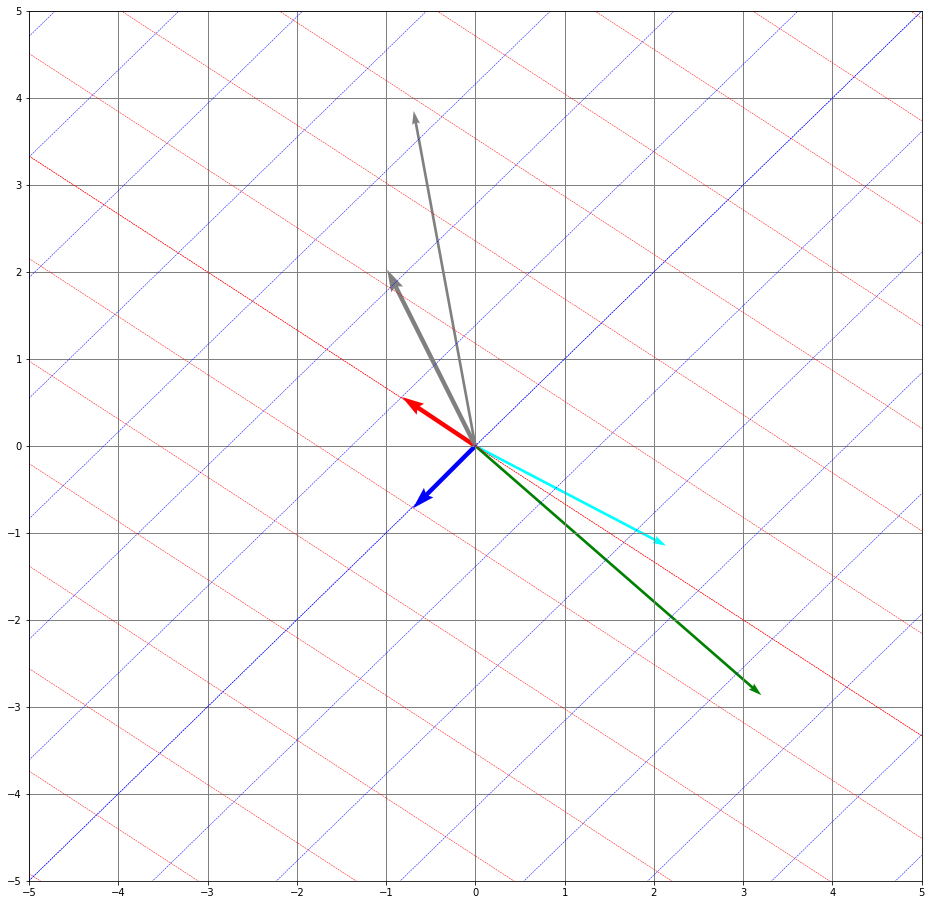

In [155]:
dmax=5

plt.figure(figsize=(16,16))
plt.xlim((-dmax,dmax))
plt.ylim((-dmax,dmax))
plt.xticks(np.arange(-dmax, dmax+1, 1.0))
plt.yticks(np.arange(-dmax, dmax+1, 1.0))
plt.grid(color='grey', linestyle='-', linewidth=1, which='both')

plt.quiver(0, 0, w1[0], w1[1], units='xy' ,scale=1, color='red', width = 0.05)
plt.quiver(0, 0, w2[0], w2[1], units='xy' ,scale=1, color='blue', width = 0.05)

plt.quiver(0, 0, x[0], x[1], units='xy' ,scale=1, color='grey', width = 0.05)
plt.quiver(0, 0, x_1[0], x_1[1], units='xy' ,scale=1, color='cyan', width = 0.03, ls = '-.')
plt.quiver(0, 0, x_2[0], x_2[1], units='xy' ,scale=1, color='green', width = 0.03, ls = '-.')
plt.quiver(0, 0, x_3[0], x_3[1], units='xy' ,scale=1, color='grey', width = 0.03)

xa = np.linspace(-dmax,dmax,100)
dist=w2[1]-w1[1]*w2[0]/w1[0]
for j in range(0,10):
    i=j*dist
    ya = w1[1]/w1[0]*xa+i
    plt.plot(xa, ya, '--r',lw ='0.5')
    ya = w1[1]/w1[0]*xa-i
    plt.plot(xa, ya, '--r',lw ='0.5')
dist=w1[1]-w2[1]*w1[0]/w2[0]
for j in range(0,10):
    i=j*dist
    ya = w2[1]/w2[0]*xa+i
    plt.plot(xa, ya, '--b',lw ='0.5')
    ya = w2[1]/w2[0]*xa-i
    plt.plot(xa, ya, '--b',lw ='0.5')

plt.show()

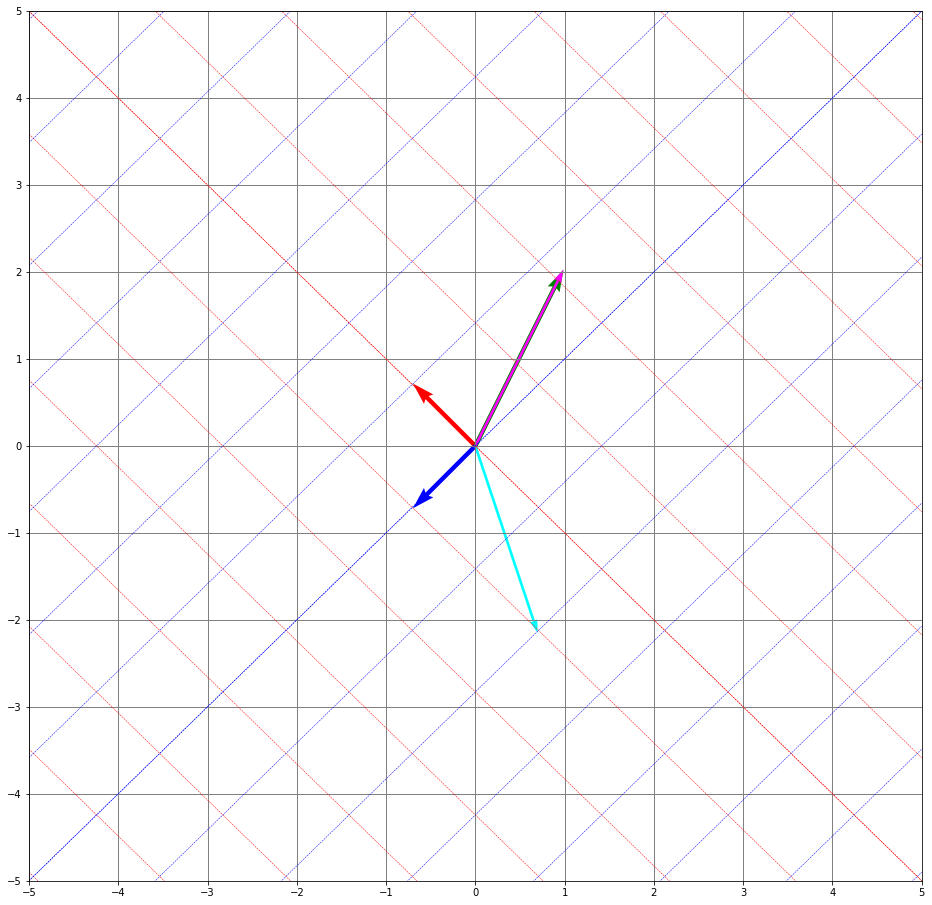

In [20]:
v1 = np.array([-1,1])
v1 = v1/np.linalg.norm(v1)
v2 = np.array([-1,-1])
v2 = v2/np.linalg.norm(v2)

A=np.column_stack((v1,v2))
x=np.array([1,2])

w1=A[:,0]
w2=A[:,1]

x_1=A.transpose().dot(x)
x_2=A.dot(x_1)


dmax=5

plt.figure(figsize=(16,16))
plt.xlim((-dmax,dmax))
plt.ylim((-dmax,dmax))
plt.xticks(np.arange(-dmax, dmax+1, 1.0))
plt.yticks(np.arange(-dmax, dmax+1, 1.0))
plt.grid(color='grey', linestyle='-', linewidth=1, which='both')

plt.quiver(0, 0, w1[0], w1[1], units='xy' ,scale=1, color='red', width = 0.05)
plt.quiver(0, 0, w2[0], w2[1], units='xy' ,scale=1, color='blue', width = 0.05)

plt.quiver(0, 0, x[0], x[1], units='xy' ,scale=1, color='green', width = 0.05)

plt.quiver(0, 0, x_1[0], x_1[1], units='xy' ,scale=1, color='cyan', width = 0.03, ls = '-.')
plt.quiver(0, 0, x_2[0], x_2[1], units='xy' ,scale=1, color='magenta', width = 0.03, ls = '-.')

xa = np.linspace(-dmax,dmax,100)
dist=w2[1]-w1[1]*w2[0]/w1[0]
for j in range(0,10):
    i=j*dist
    ya = w1[1]/w1[0]*xa+i
    plt.plot(xa, ya, '--r',lw ='0.5')
    ya = w1[1]/w1[0]*xa-i
    plt.plot(xa, ya, '--r',lw ='0.5')
dist=w1[1]-w2[1]*w1[0]/w2[0]
for j in range(0,10):
    i=j*dist
    ya = w2[1]/w2[0]*xa+i
    plt.plot(xa, ya, '--b',lw ='0.5')
    ya = w2[1]/w2[0]*xa-i
    plt.plot(xa, ya, '--b',lw ='0.5')

plt.show()